In [5]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

ox.__version__

'1.9.3'

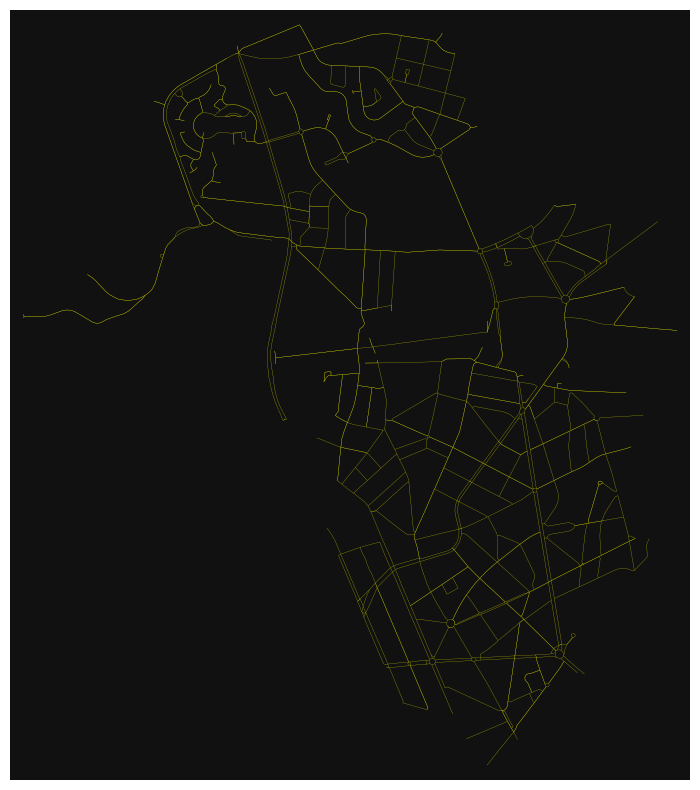

In [2]:
place = {"country": "Belgium", "Subarea": "Bruxelles-Capitale", "city": "Jette"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

In [3]:
def heuristic(u,v):
    node_u = G.nodes[u]
    node_v = G.nodes[v]
    return ((node_u['x'] - node_v['x'])**2 + (node_u['y'] - node_v['y'])**2)**0.5

# Define start and end nodes
start_node = list(G.nodes)[0]
end_node = list(G.nodes)[-1]
# Apply A* algorithm
route = nx.astar_path(G, start_node, end_node, heuristic=heuristic)

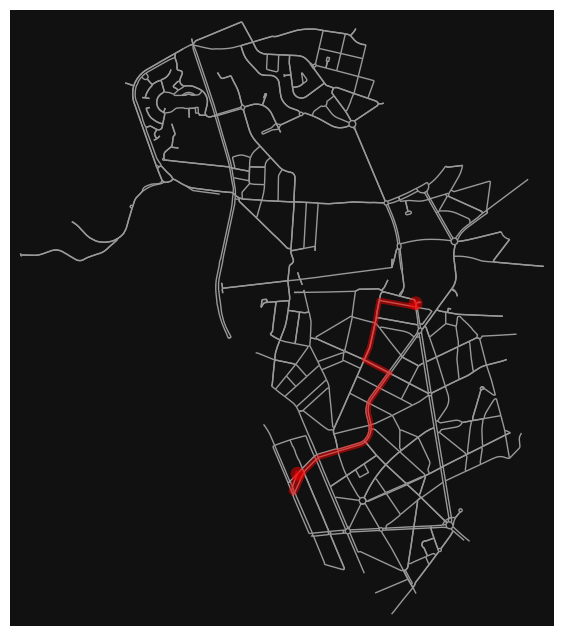

In [6]:
fig, ax = ox.plot_graph_route(G, route, node_size=0)
plt.show()

Let's do this by hand

In [7]:
import math
from heapq import heappop, heappush
from itertools import count


# Heuristic
def euclidean_distance(u,v):
    ux, uy = u
    vx, vy = v
    return math.sqrt((ux - uv) ** 2 + (uy - vy) ** 2)

def a_star_algorithm(G, start, goal, heuristic):
    # The open set as a priority queue
    open_set = []
    heappush(open_set, (0, start, None))  # (f_score, node, predecessor)

    # Cost from start to all other nodes
    g_score = {node: float('inf') for node in G.nodes}
    g_score[start] = 0

    # For path reconstruction
    came_from = {}

    # Closed set to keep track of visited nodes
    closed_set = set()

    while open_set:
        current_f, current, current_pred = heappop(open_set)

        if current in closed_set:
            continue

        if current == goal:
            # Reconstruct path
            path = []
            while current:
                path.append(current)
                current = came_from.get(current, None)
            return path[::-1]  # Return reversed path

        closed_set.add(current)
        came_from[current] = current_pred

        for neighbor, edge_attr in G[current].items():
            if neighbor in closed_set:
                continue
            tentative_g_score = g_score[current] + edge_attr['weight']

            if tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(G.nodes[neighbor]['x'], G.nodes[goal]['x'])
                heappush(open_set, (f_score, neighbor, current))

    return None  # Path not found


In [8]:
start, goal = list(G.nodes())[0], list(G.nodes())[-1]
path = a_star_algorithm(G, start, goal, lambda u, v: euclidean_distance((G.nodes[u]['x'], G.nodes[u]['y']), (G.nodes[v]['x'], G.nodes[v]['y'])))

KeyError: 'weight'

In [ ]:
fig, ax = ox.plot_graph_route(G, path)

In [13]:
nx

<module 'networkx' from '/home/onyx/anaconda3/envs/ox/lib/python3.12/site-packages/networkx/__init__.py'>